# Some draft code for messing around with the SXS data

In [ ]:
import numpy as np
print ( "numpy version" , np.__version__ )

import scipy
print ( "scipy version" , scipy.__version__ )

import matplotlib
from matplotlib import pyplot as plt
print ( "matplotlib version" , matplotlib.__version__ )

import os

In [65]:
# Functions



# Get the mass ratio for a particular SXS simulation from the metadata file
def GetMassRatio ( ID ):
    
    fname = "../data/SXS_data/" + ID + "/metadata" + ID.split('-')[1] + ".txt"
    
    with open(fname) as f:
        content = f.readlines()
    
    for line in content:
        if "relaxed-mass1" in line:
            relaxed_mass1 = float ( line.split()[-1] )
        elif "relaxed-mass2" in line:
            relaxed_mass2 = float ( line.split()[-1] )

    mass_ratio = relaxed_mass1 / relaxed_mass2
    
    return mass_ratio



# Sort a list of simulations into order of increasing mass ratio 
def SortSXSsimulations ( simulations ):
    
    mass_ratios = [ [ ID , GetMassRatio ( ID ) ] for ID in simulations ]
    
    indices = np.argsort( [ row[1] for row in mass_ratios ] )
    
    mass_ratios = [ mass_ratios[row] for row in indices ]
    
    newsimulations = [ m[0] for m in mass_ratios ]
    
    return newsimulations



# Load some of the relevent metadata for a particular SXS simulation
def LoadMetaData ( ID ):
    
    fname = "../data/SXS_data/" + ID + "/metadata" + ID.split('-')[1] + ".txt"
    
    with open(fname) as f:
        content = f.readlines()
    
    for line in content:
        if "relaxed-mass1" in line:
            relaxed_mass1 = float ( line.split()[-1] )
        elif "relaxed-mass2" in line:
            relaxed_mass2 = float ( line.split()[-1] )
        elif "remnant-mass" in line:
            remnant_mass = float ( line.split()[-1] )
    
    total_mass = relaxed_mass1 + relaxed_mass2
    mass_ratio = relaxed_mass1 / relaxed_mass2
    Delta_E = ( total_mass - remnant_mass ) / total_mass
    
    return np.array ( [ mass_ratio , Delta_E ] )



# Load the 22 modes of strain for a particular SXS simulation
def Load22Mode ( ID ):
    
    fname = "../data/SXS_data/" + ID + "/StrainMode_l2_m2.txt"
    
    return np.loadtxt ( fname )



# Plot all of the SXS gravitational waveforms
def PlotGWs ( simulations ):
    
    offset = 0
    
    for ID in simulations:
        d=Load22Mode ( ID )
        plt.plot ( d[:,0] , d[:,1]+offset , label='q={0:.2f}'.format(GetMassRatio(ID)) )
        offset -= 2.5
    
    plt.legend ( loc = 'center left' )
    plt.show ( )
    plt.clf ( )


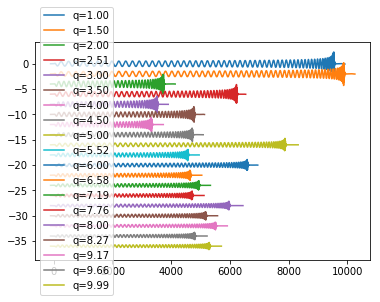

In [64]:
# Code

# Get the list of SXS simulation ID numbers
simulations = os.listdir ( "../data/SXS_data/" )
simulations = [ item for item in simulations if ("SXS-" in item) ]

# Sort the simulations into increasing mass ratio order
simulations = SortSXSsimulations(simulations)

# Plot the strain GW waveform
PlotGWs(simulations)
